In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [2]:
#load data 
data = pd.read_csv('data/day.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [3]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1)
# remove column with hours
#X = np.delete(X,5,1) 

# splitting training and testing data (targer)
y_registered = data_array[:,-2]


In [4]:
# split the data for training 
X_train, X_test, y_registered_train, y_registered_test = model_selection.train_test_split(X, y_registered, test_size=0.2)
#y_registered_train = y_registered_train[:,np.newaxis]
#y_registered_test = y_registered_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_registered_train.shape, y_registered_test.shape )

(584, 12) (147, 12) (584,) (147,)


In [5]:
# idk why but we need to change type even thou type(y_registered) output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_registered_train=y_registered_train.astype('int')
y_registered_test=y_registered_test.astype('int')


In [6]:

regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_registered_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_registered_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_registered_test))


Coefficients: [   -3.37304293   455.36240544  2973.89965767    79.56195923  -203.7321203
    48.13518478   963.62279978  -486.02277201  1595.96502498  1854.9869595
  -509.69521424 -1831.84668608]
Residual sum of squares: 462287.10
Variance score: 0.78


In [8]:
X_test.shape

(147, 12)

In [9]:
y_registered_test.shape

(147,)

In [10]:
y_registered_test.resize(X_test.shape)

In [11]:
y_registered_test

array([[2931, 3176, 3840, ..., 2818,  674, 2623],
       [3698, 2137, 4240, ..., 1454, 4023,  432],
       [4224, 5254, 6102, ..., 3077, 1299, 2993],
       ..., 
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

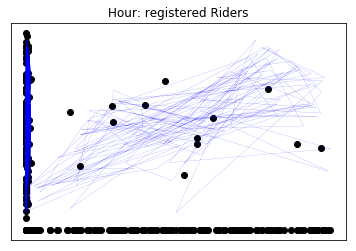

In [12]:
# visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_registered_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=0.1)

plt.xticks(())
plt.yticks(())
plt.title('Hour: registered Riders')
plt.show()